In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('sales_data.csv')

In [8]:
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


<Axes: >

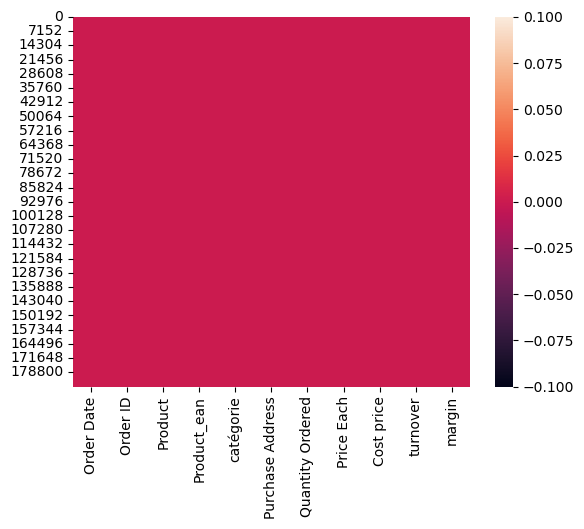

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,185950.000000,1.859500e+05,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,5.509211e+12,1.124383,184.399735,69.668583,185.490917,115.289422
std,51512.737110,2.598403e+12,0.442793,332.731330,109.424191,332.919771,225.227190
min,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185831.250000,3.254280e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230367.500000,5.511235e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275035.750000,7.765195e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319670.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000


In [30]:
features = ['Product_ean', 'Price Each', 'turnover', 'Quantity Ordered']
x = df[features]
y = df['Cost price']
x.shape, y.shape

((185950, 4), (185950,))

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
y_test.shape

(37190,)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(x_test)

In [34]:
y = lr.score(x_test, y_test)
print('Akurasi Model Regresi Linier:', y)

Akurasi Model Regresi Linier: 0.9939195048015663


In [38]:
#Product ean = 2.113973e+12	, Price Each = 149.99 , turnover = 185.490917 , Quantity Ordered = 1
inputan = np.array([[2.113973e+12, 149.99, 2.990000, 1]])
prediksi = lr.predict(inputan)
print('sales :', prediksi)

sales : [91.05752142]


c:\Users\L e n o v o\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
import pickle
filename = 'sales_data.sav'
pickle.dump(lr,open(filename,'wb'))